Cargando base de datos...

Información inicial del dataset
Dimensiones: (3896, 15)
Columnas disponibles: ['id', 'casa', 'coto', 'tipo', 'status', 'monto', 'concepto_original', 'hasta el mes', 'fecha_creacion', 'fecha_pago', 'info_recibo', 'Estatus pago', 'Moroso', 'Numero de moras maxima', 'moras']

Primeras filas:


,id,casa,coto,tipo,status,monto,concepto_original,hasta el mes,fecha_creacion,fecha_pago,info_recibo,Estatus pago,Moroso,Numero de moras maxima,moras
0,6644ed063cc8e,Casa 49,Casa 4,mantenimiento,PAGADO,1600,may-24,2024-05-01,2024-05-15 17:12:38,2024-05-15 17:13:05,sin info,PAGADO,VIGENTE,0,0
1,64c8f3c33be4d,Coto 1 Casa 1,Coto 1,mantenimiento,PAGADO,1400,ago-23,2023-08-01,2023-08-01 12:00:03,2023-08-18 21:39:23,sin info,PAGADO,VIGENTE,0,0
2,64f1d2435d3a1,Coto 1 Casa 1,Coto 1,mantenimiento,PAGADO,1400,sep-23,2023-09-01,2023-09-01 12:00:03,2023-09-04 20:21:06,sin info,PAGADO,VIGENTE,0,0
3,65195f4293f76,Coto 1 Casa 1,Coto 1,mantenimiento,PAGADO,1400,oct-23,2023-10-01,2023-10-01 12:00:02,2023-10-07 21:54:47,sin info,PAGADO,VIGENTE,0,0
4,65423dc2b2955,Coto 1 Casa 1,Coto 1,mantenimiento,PAGADO,1400,nov-23,2023-11-01,2023-11-01 12:00:02,2023-11-06 16:46:20,sin info,PAGADO,VIGENTE,0,0



Transformando fechas y creando nuevas variables temporales...
Variables temporales generadas: mes/año de creación y pago, y días transcurridos entre fechas.

Codificando variables categóricas...
Codificada: tipo → tipo_enc
Codificada: status → status_enc
Codificada: concepto_original → concepto_original_enc
Codificada: info_recibo → info_recibo_enc
Codificada: Estatus pago → Estatus pago_enc
Codificada: Moroso → Moroso_enc
Codificada: coto → coto_enc

Escalando variables numéricas...
Escalamiento realizado. Dimensiones finales para reducción: (3643, 14)

Aplicando PCA para reducción de dimensionalidad...


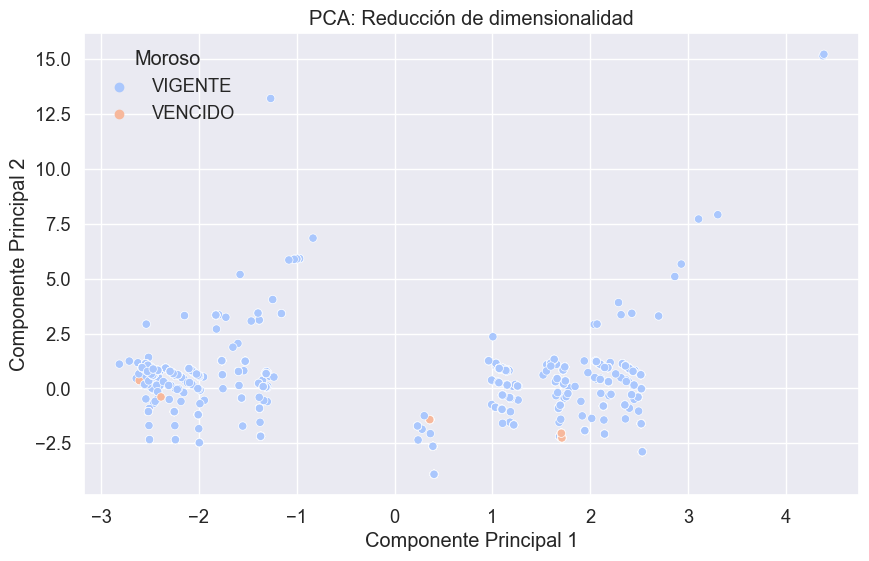

Conclusión PCA:
La visualización muestra agrupamientos parciales entre clientes morosos y no morosos, lo que sugiere que
la combinación de características codificadas y escaladas tiene cierta capacidad para diferenciar estos grupos.

Aplicando t-SNE para reducción de dimensionalidad...


C:\Users\AMUNGUIA\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\AMUNGUIA\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


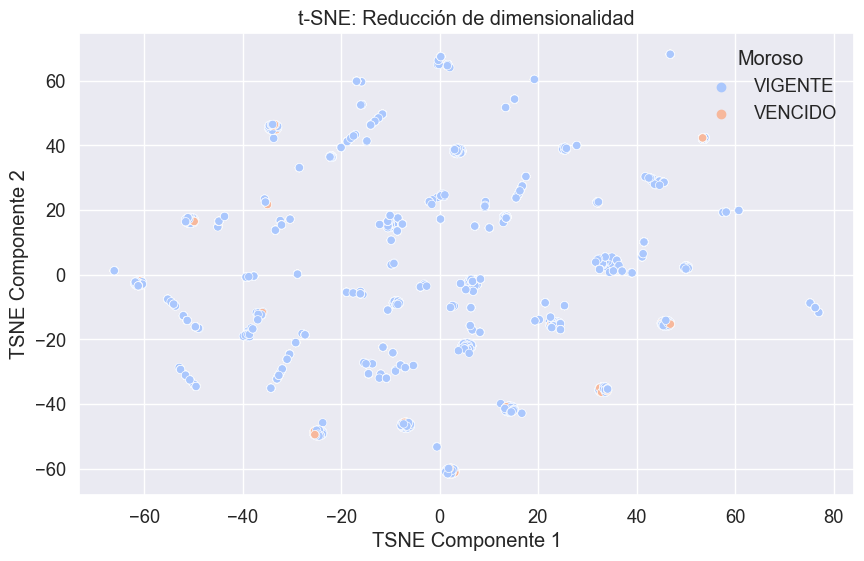

Conclusión t-SNE:
t-SNE muestra una separación más clara entre clases que PCA, indicando que las relaciones no lineales
entre las variables originales pueden aportar valor predictivo en modelos posteriores.

RESUMEN
• Se transformaron y escalaron correctamente las variables.
• Se aplicaron PCA y t-SNE como técnicas de reducción dimensional.
• Ambas técnicas permiten visualizar patrones de agrupamiento útiles para clasificación.

Documento Word exportado correctamente: C:\Users\AMUNGUIA\Desktop\resultados_dimensionalidad.docx


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from docx import Document
from docx.shared import Inches
import os

# Configurar segun las visualizaciones requeridas
plt.style.use("seaborn-whitegrid")
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)

# Leyendo el data set de manera local
print("Cargando base de datos...")
ruta = r'C:\Users\AMUNGUIA\Desktop\PIA\proyecto\base propuesta micoto simple.xlsx'
df = pd.read_excel(ruta)

print("\nInformación inicial del dataset")
print(f"Dimensiones: {df.shape}")
print("Columnas disponibles:", df.columns.tolist())
print("\nPrimeras filas:")
display(df.head())

# -------------------------------------------------------------------------------------------------------

# Transformacion variables temporales
print("\nTransformando fechas y creando nuevas variables temporales...")

df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'], errors='coerce')
df['fecha_pago'] = pd.to_datetime(df['fecha_pago'], errors='coerce')

# Nuevas variables derivadas
df['mes_creacion'] = df['fecha_creacion'].dt.month
df['mes_pago'] = df['fecha_pago'].dt.month
df['anio_creacion'] = df['fecha_creacion'].dt.year
df['anio_pago'] = df['fecha_pago'].dt.year
df['dias_pago'] = (df['fecha_pago'] - df['fecha_creacion']).dt.days

# Imputación de valores faltantes en días de pago
df['dias_pago'] = df['dias_pago'].fillna(-1)

print("Variables temporales generadas: mes/año de creación y pago, y días transcurridos entre fechas.")

# -------------------------------------------------------------------------------------------------------

# Variables Categoricas
categoricas = ['tipo', 'status', 'concepto_original', 'info_recibo', 'Estatus pago', 'Moroso', 'coto']
df[categoricas] = df[categoricas].astype(str)

print("\nCodificando variables categóricas...")
le_dict = {}
for col in categoricas:
    le = LabelEncoder()
    df[col + '_enc'] = le.fit_transform(df[col])
    le_dict[col] = le
    print(f"Codificada: {col} → {col + '_enc'}")
          
# -------------------------------------------------------------------------------------------------------          

# Escalamiento variables numéricas
print("\nEscalando variables numéricas...")

variables_numericas = [
    'monto', 'Numero de moras maxima', 'dias_pago',
    'mes_creacion', 'mes_pago', 'anio_creacion', 'anio_pago'
] + [col + '_enc' for col in categoricas]

df_scaled = df[variables_numericas].replace([np.inf, -np.inf], np.nan).dropna()
scaler = StandardScaler()
df_scaled_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled_scaled, columns=variables_numericas)

print("Escalamiento realizado. Dimensiones finales para reducción:", df_scaled.shape)
          
# -------------------------------------------------------------------------------------------------------           

# PCA
print("\nAplicando PCA para reducción de dimensionalidad...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df_vis = df.loc[df_scaled.index].copy()
df_vis['PCA1'] = pca_result[:, 0]
df_vis['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_vis, x='PCA1', y='PCA2', hue='Moroso', palette='coolwarm')
plt.title('PCA: Reducción de dimensionalidad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Moroso')
plt.show()

# Conclusión PCA
print("Conclusión PCA:")
print("La visualización muestra agrupamientos parciales entre clientes morosos y no morosos, lo que sugiere que\n"
      "la combinación de características codificadas y escaladas tiene cierta capacidad para diferenciar estos grupos.")
          
          
# ------------------------------------------------------------------------------------------------------
# tsne
print("\nAplicando t-SNE para reducción de dimensionalidad...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(df_scaled)

df_vis['TSNE1'] = tsne_result[:, 0]
df_vis['TSNE2'] = tsne_result[:, 1]

# Visualización t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_vis, x='TSNE1', y='TSNE2', hue='Moroso', palette='coolwarm')
plt.title('t-SNE: Reducción de dimensionalidad')
plt.xlabel('TSNE Componente 1')
plt.ylabel('TSNE Componente 2')
plt.legend(title='Moroso')
plt.show()
          
          
# ------------------------------------------------------------------------------------------------------
# Conclusión t-SNE
print("Conclusión t-SNE:")
print("t-SNE muestra una separación más clara entre clases que PCA, indicando que las relaciones no lineales\n"
      "entre las variables originales pueden aportar valor predictivo en modelos posteriores.")

# ESUMEN FINAL
print("\nRESUMEN")
print("• Se transformaron y escalaron correctamente las variables.")
print("• Se aplicaron PCA y t-SNE como técnicas de reducción dimensional.")
print("• Ambas técnicas permiten visualizar patrones de agrupamiento útiles para clasificación.")
          
# ------------------------------------------------------------------------------------------------------
# Exportar gráficas y conclusiones a Word
from docx import Document
from docx.shared import Inches
import os

# Guardar imágenes ya generadas
pca_img = "grafico_pca.png"
tsne_img = "grafico_tsne.png"

# Guardar la imagen PCA (se agregó en su bloque original)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_vis, x='PCA1', y='PCA2', hue='Moroso', palette='coolwarm')
plt.title('PCA: Reducción de dimensionalidad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Moroso')
plt.savefig(pca_img, bbox_inches='tight')
plt.close()

# Guardar la imagen t-SNE (se agregó en su bloque original)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_vis, x='TSNE1', y='TSNE2', hue='Moroso', palette='coolwarm')
plt.title('t-SNE: Reducción de dimensionalidad')
plt.xlabel('TSNE Componente 1')
plt.ylabel('TSNE Componente 2')
plt.legend(title='Moroso')
plt.savefig(tsne_img, bbox_inches='tight')
plt.close()

# Crear documento Word
documento = Document()
documento.add_heading("Resultados de Reducción de Dimensionalidad", 0)

documento.add_heading("PCA", level=1)
documento.add_paragraph(
    "La visualización muestra agrupamientos parciales entre clientes morosos y no morosos, "
    "lo que sugiere que la combinación de características codificadas y escaladas tiene cierta "
    "capacidad para diferenciar estos grupos."
)
documento.add_picture(pca_img, width=Inches(5.5))

documento.add_heading("t-SNE", level=1)
documento.add_paragraph(
    "t-SNE muestra una separación más clara entre clases que PCA, indicando que las relaciones no lineales "
    "entre las variables originales pueden aportar valor predictivo en modelos posteriores."
)
documento.add_picture(tsne_img, width=Inches(5.5))

documento.add_heading("Resumen Final", level=1)
documento.add_paragraph(
    "• Se transformaron y escalaron correctamente las variables.\n"
    "• Se aplicaron PCA y t-SNE como técnicas de reducción dimensional.\n"
    "• Ambas técnicas permiten visualizar patrones de agrupamiento útiles para clasificación."
)

# Guardar documento
nombre_doc = r'C:\Users\AMUNGUIA\Desktop\resultados_dimensionalidad.docx'
documento.save(nombre_doc)
print(f"\nDocumento Word exportado correctamente: {os.path.abspath(nombre_doc)}")

          
